# Group Information and Project Details

## Project Title:
KSI-Collision Predictor (COMP 247)

## Team Name:
Sigma

## Group Members:
- Jainam Patel
- Sagar Parmar
- Yeasin
- Yohanees
- Divyanshu Sharma


In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import sklearn
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sigma_df = pd.read_csv('KSI.csv')

In [126]:
sigma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18194 entries, 0 to 18193
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  18194 non-null  float64
 1   Y                  18194 non-null  float64
 2   INDEX_             18194 non-null  int64  
 3   ACCNUM             13264 non-null  float64
 4   YEAR               18194 non-null  int64  
 5   DATE               18194 non-null  object 
 6   TIME               18194 non-null  int64  
 7   STREET1            18194 non-null  object 
 8   STREET2            16510 non-null  object 
 9   OFFSET             3402 non-null   object 
 10  ROAD_CLASS         17818 non-null  object 
 11  DISTRICT           18089 non-null  object 
 12  WARDNUM            17332 non-null  float64
 13  LATITUDE           18194 non-null  float64
 14  LONGITUDE          18194 non-null  float64
 15  LOCCOORD           18099 non-null  object 
 16  ACCLOC             127

In [127]:
sigma_df.describe()

,X,Y,INDEX_,ACCNUM,YEAR,TIME,WARDNUM,LATITUDE,LONGITUDE,FATAL_NO,ObjectId
count,1.819400e+04,1.819400e+04,1.819400e+04,1.326400e+04,18194.000000,18194.000000,1.733200e+04,18194.000000,18194.000000,827.000000,18194.000000
mean,-8.838345e+06,5.420748e+06,3.818870e+07,4.248444e+08,2012.934869,1362.615917,2.521028e+03,43.710459,-79.396201,29.073761,9097.500000
std,1.162533e+04,8.682160e+03,3.726463e+07,1.065503e+09,4.754258,630.816048,1.844803e+05,0.056369,0.104432,17.803627,5252.299734
min,-8.865305e+06,5.402162e+06,3.363207e+06,2.530100e+04,2006.000000,0.000000,1.000000e+00,43.589678,-79.638390,1.000000,1.000000
25%,-8.846591e+06,5.413242e+06,5.391370e+06,1.021229e+06,2009.000000,920.000000,7.000000e+00,43.661727,-79.470280,14.000000,4549.250000
50%,-8.838448e+06,5.419556e+06,7.644612e+06,1.197308e+06,2012.000000,1450.000000,1.300000e+01,43.702745,-79.397132,28.000000,9097.500000
75%,-8.829671e+06,5.427813e+06,8.078261e+07,1.365020e+06,2017.000000,1850.000000,2.200000e+01,43.756345,-79.318286,42.000000,13645.750000
max,-8.807929e+06,5.443099e+06,8.170606e+07,4.008024e+09,2022.000000,2359.000000,1.716222e+07,43.855445,-79.122974,78.000000,18194.000000


In [128]:
sigma_df.isnull().sum()

X                        0
Y                        0
INDEX_                   0
ACCNUM                4930
YEAR                     0
DATE                     0
TIME                     0
STREET1                  0
STREET2               1684
OFFSET               14792
ROAD_CLASS             376
DISTRICT               105
WARDNUM                862
LATITUDE                 0
LONGITUDE                0
LOCCOORD                95
ACCLOC                5450
TRAFFCTL                34
VISIBILITY              20
LIGHT                    0
RDSFCOND                25
ACCLASS                  5
IMPACTYPE                4
INVTYPE                 16
INVAGE                   0
INJURY                8567
FATAL_NO             17367
INITDIR               5052
VEHTYPE               3228
MANOEUVER             7660
DRIVACT               8951
DRIVCOND              8954
PEDTYPE              15134
PEDACT               15112
PEDCOND              15110
CYCLISTYPE           17420
CYCACT               17428
C

# Vizualization of dataset

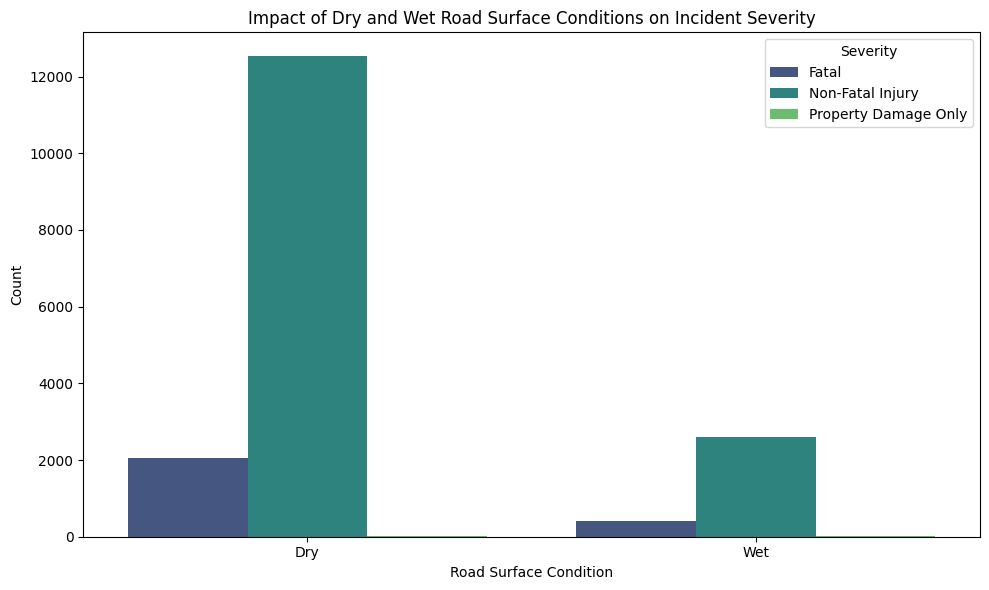

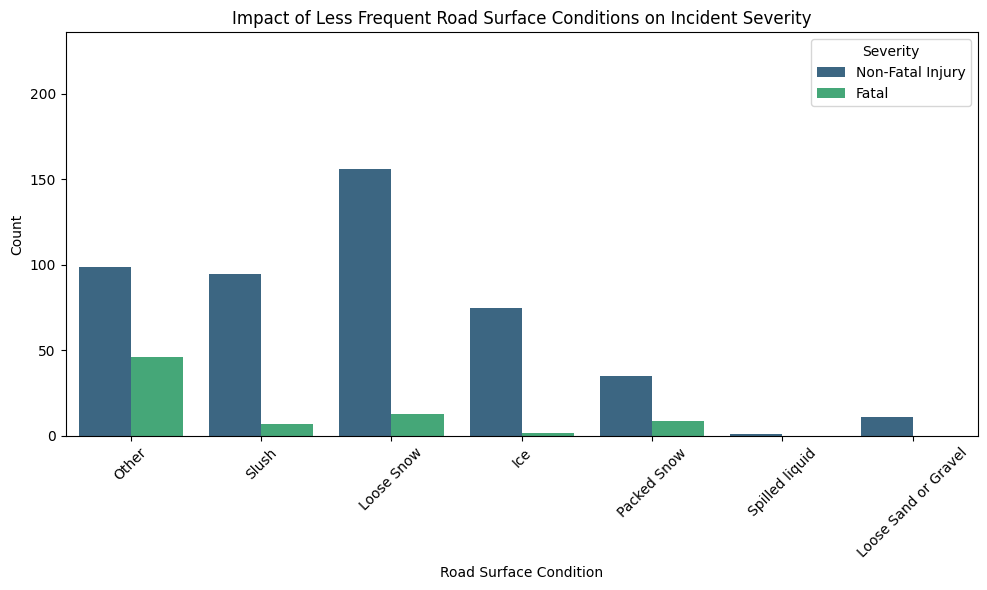

In [132]:
# plt.figure(figsize=(10, 6))
# sns.countplot(x='RDSFCOND', hue='ACCLASS', data=sigma_df, palette='viridis')
# plt.title('Impact of Road Surface Conditions on Incident Severity')
# plt.xticks(rotation=45)
# plt.xlabel('Road Surface Condition')
# plt.ylabel('Count')
# plt.legend(title='Severity')
# plt.tight_layout()
# plt.show()
plt.figure(figsize=(10, 6))
# Filter the dataframe for 'Dry' and 'Wet' conditions
common_conditions_df = sigma_df[sigma_df['RDSFCOND'].isin(['Dry', 'Wet'])]
sns.countplot(x='RDSFCOND', hue='ACCLASS', data=common_conditions_df, palette='viridis')
plt.title('Impact of Dry and Wet Road Surface Conditions on Incident Severity')
plt.xlabel('Road Surface Condition')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
# Filter the dataframe to exclude 'Dry' and 'Wet' conditions
rare_conditions_df = sigma_df[~sigma_df['RDSFCOND'].isin(['Dry', 'Wet'])]
sns.countplot(x='RDSFCOND', hue='ACCLASS', data=rare_conditions_df, palette='viridis')
plt.title('Impact of Less Frequent Road Surface Conditions on Incident Severity')
plt.xlabel('Road Surface Condition')
plt.ylabel('Count')


max_count_rare_conditions = rare_conditions_df['ACCLASS'].value_counts().max()

upper_y_limit = max_count_rare_conditions / 2  

plt.ylim(0, upper_y_limit)

plt.legend(title='Severity')
plt.xticks(rotation=45)  # Ensuring that x labels do not overlap
plt.tight_layout()
plt.show()


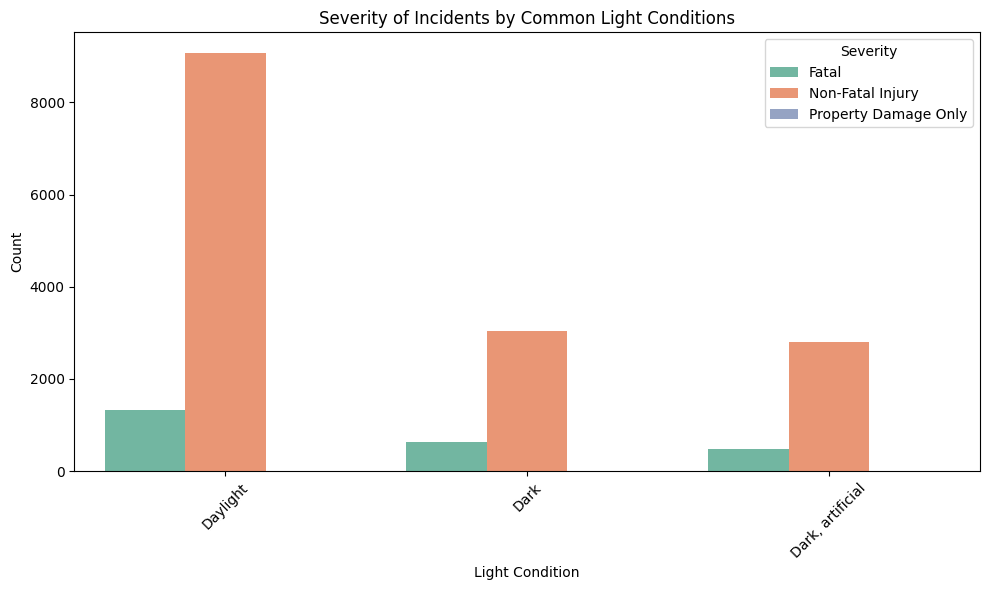

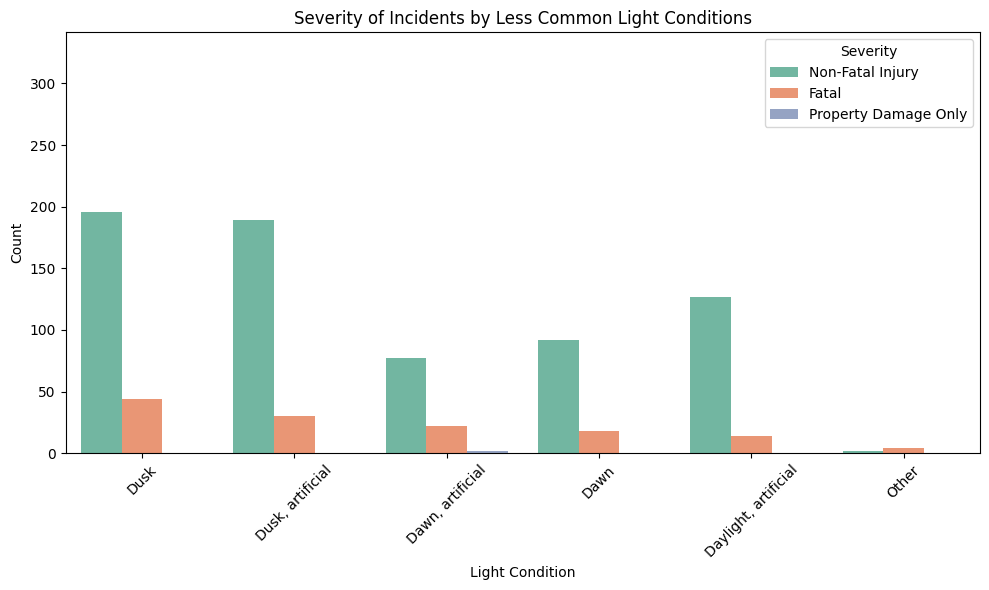

In [129]:
# plt.figure(figsize=(10, 6))
# sns.countplot(x='LIGHT', hue='ACCLASS', data=sigma_df, palette='Set2')
# plt.title('Severity of Incidents by Light Conditions')
# plt.xticks(rotation=45)
# plt.xlabel('Light Condition')
# plt.ylabel('Count')
# plt.legend(title='Severity')
# plt.tight_layout()
# plt.show()
plt.figure(figsize=(10, 6))
# Filter the dataframe for the specified light conditions
common_light_conditions_df = sigma_df[sigma_df['LIGHT'].isin(['Daylight', 'Dark', 'Dark, artificial'])]
sns.countplot(x='LIGHT', hue='ACCLASS', data=common_light_conditions_df, palette='Set2')
plt.title('Severity of Incidents by Common Light Conditions')
plt.xlabel('Light Condition')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
# Filter the dataframe for the less common light conditions
rare_light_conditions_df = sigma_df[~sigma_df['LIGHT'].isin(['Daylight', 'Dark', 'Dark, artificial'])]
sns.countplot(x='LIGHT', hue='ACCLASS', data=rare_light_conditions_df, palette='Set2')
plt.title('Severity of Incidents by Less Common Light Conditions')
plt.xlabel('Light Condition')
plt.ylabel('Count')


max_count_rare_light = rare_light_conditions_df['ACCLASS'].value_counts().max()
upper_y_limit = max_count_rare_light / 2

plt.ylim(0, upper_y_limit)  # Apply the new y-axis range

plt.legend(title='Severity')
plt.xticks(rotation=45)  # Ensuring x labels do not overlap
plt.tight_layout()
plt.show()

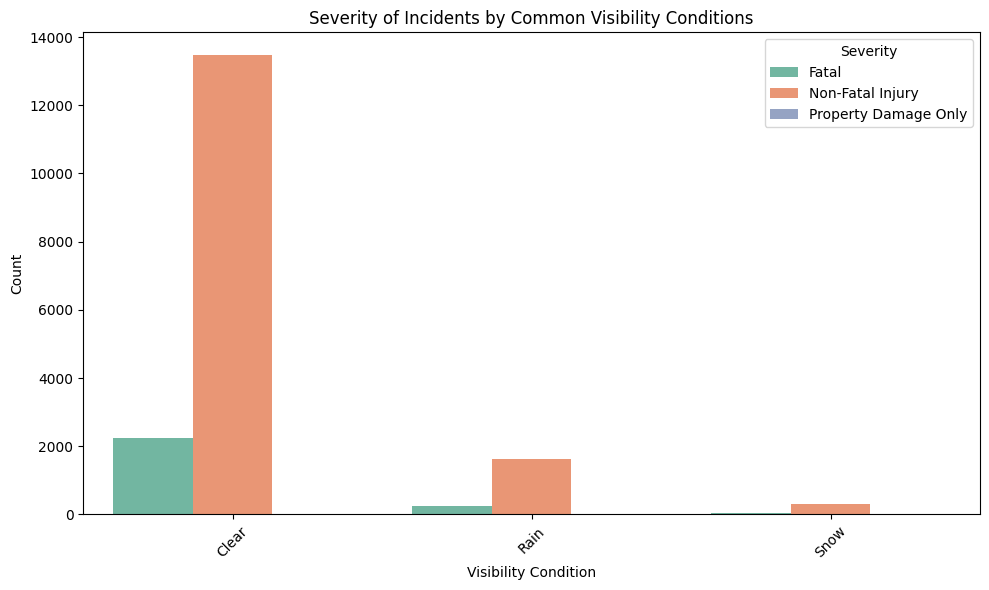

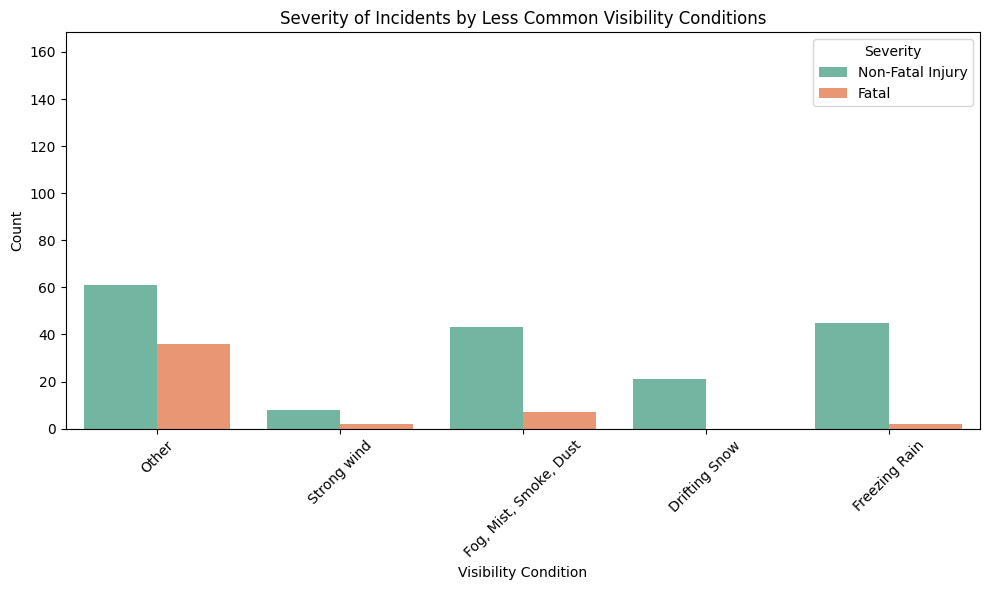

In [130]:
# plt.figure(figsize=(10, 6))
# sns.countplot(x='VISIBILITY', hue='ACCLASS', data=sigma_df, palette='Set2')
# plt.title('Severity of Incidents by Visibility Conditions')
# plt.xticks(rotation=45)
# plt.xlabel('Visibility Condition')
# plt.ylabel('Count')
# plt.legend(title='Severity')
# plt.tight_layout()
# plt.show()
plt.figure(figsize=(10, 6))

common_visibility_conditions_df = sigma_df[sigma_df['VISIBILITY'].isin(['Clear', 'Rain', 'Snow'])]
sns.countplot(x='VISIBILITY', hue='ACCLASS', data=common_visibility_conditions_df, palette='Set2')
plt.title('Severity of Incidents by Common Visibility Conditions')
plt.xlabel('Visibility Condition')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

rare_visibility_conditions_df = sigma_df[~sigma_df['VISIBILITY'].isin(['Clear', 'Rain', 'Snow'])]
sns.countplot(x='VISIBILITY', hue='ACCLASS', data=rare_visibility_conditions_df, palette='Set2')
plt.title('Severity of Incidents by Less Common Visibility Conditions')
plt.xlabel('Visibility Condition')
plt.ylabel('Count')


clear_visibility_count = sigma_df[sigma_df['VISIBILITY'] == 'Clear']['ACCLASS'].value_counts().max()
plt.ylim(0, clear_visibility_count / 80)  

plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()# plt.show()

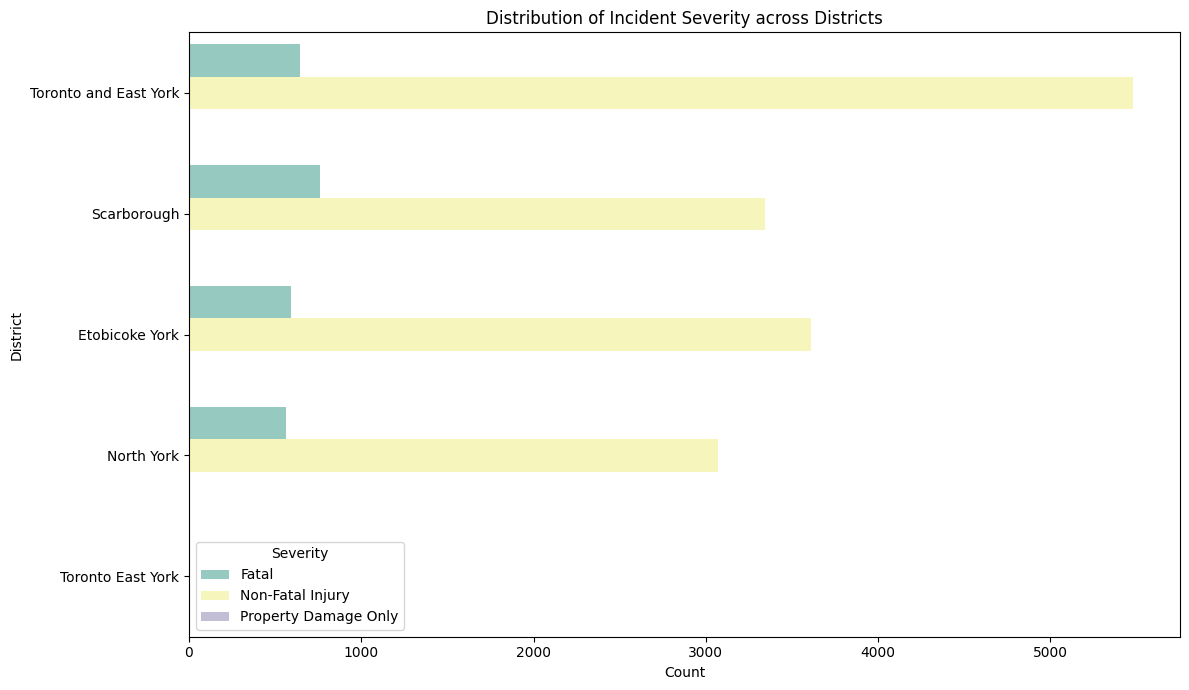

In [103]:
plt.figure(figsize=(12, 7))
sns.countplot(y='DISTRICT', hue='ACCLASS', data=sigma_df, palette='Set3')
plt.title('Distribution of Incident Severity across Districts')
plt.xlabel('Count')
plt.ylabel('District')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

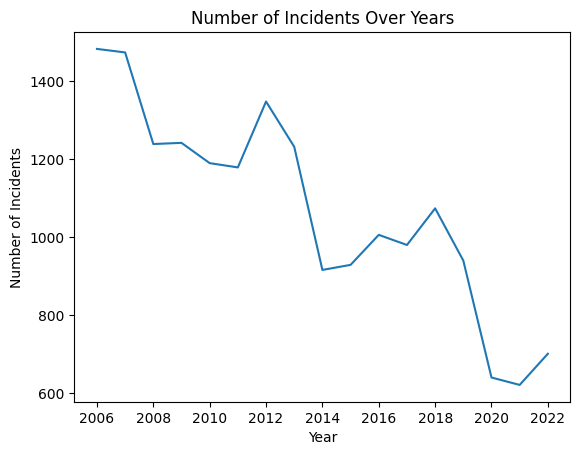

In [104]:
sns.lineplot(data=sigma_df['YEAR'].value_counts().sort_index())
plt.title('Number of Incidents Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

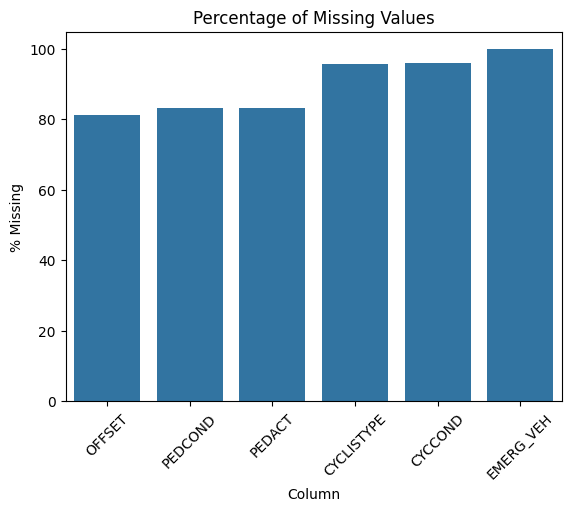

In [105]:
missing_percentage = sigma_df[['OFFSET','PEDCOND', 'PEDACT','CYCLISTYPE', 'CYCCOND','EMERG_VEH']].isnull().mean() * 100

# Plot
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.title('Percentage of Missing Values')
plt.xlabel('Column')
plt.ylabel('% Missing')
plt.xticks(rotation=45)
plt.show()

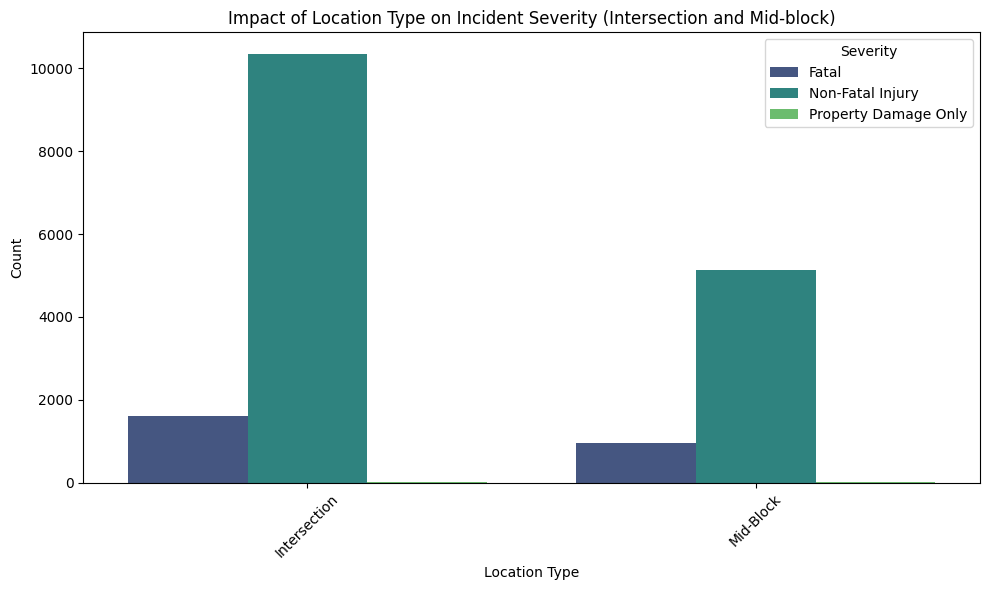

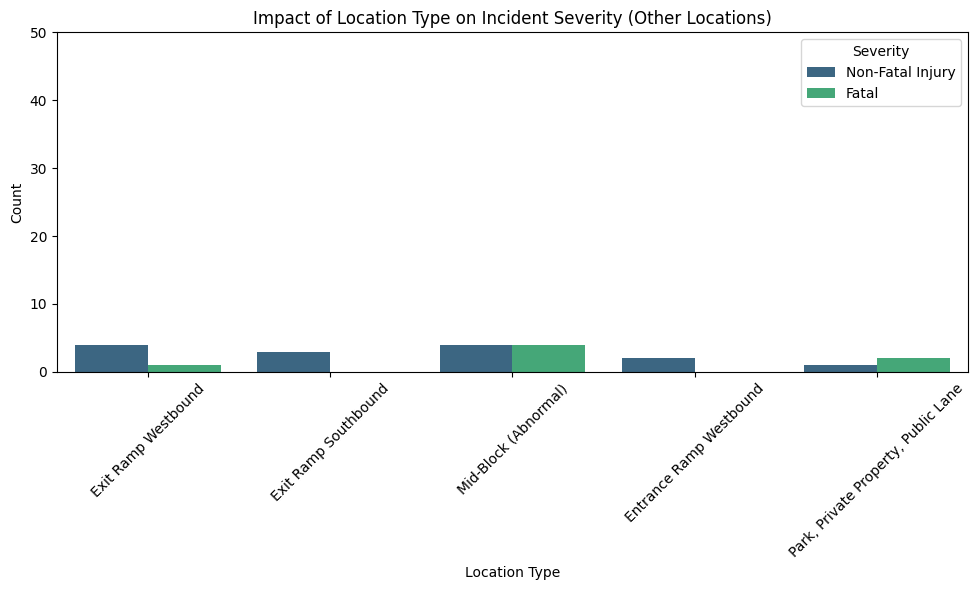

In [131]:
# plt.figure(figsize=(10, 6))
# sns.countplot(x='LOCCOORD', hue='ACCLASS', data=sigma_df, palette='viridis')
# plt.title('Impact of Location Type on Incident Severity')
# plt.xticks(rotation=45)
# plt.xlabel('Location Type')
# plt.ylabel('Count')
# plt.legend(title='Severity')
# plt.tight_layout()
# plt.show()
plt.figure(figsize=(10, 6))
# Filter the dataframe for 'Intersection' and 'Mid-block'
common_location_df = sigma_df[sigma_df['LOCCOORD'].isin(['Intersection', 'Mid-Block'])]
sns.countplot(x='LOCCOORD', hue='ACCLASS', data=common_location_df, palette='viridis')
plt.title('Impact of Location Type on Incident Severity (Intersection and Mid-block)')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))

rare_location_df = sigma_df[~sigma_df['LOCCOORD'].isin(['Intersection', 'Mid-Block'])]
sns.countplot(x='LOCCOORD', hue='ACCLASS', data=rare_location_df, palette='viridis')
plt.title('Impact of Location Type on Incident Severity (Other Locations)')
plt.xlabel('Location Type')
plt.ylabel('Count')



plt.ylim(0, 50)  

plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature selection
Seleting and classifying the features

In [107]:
features = [ 'ROAD_CLASS', 'DISTRICT', 'LOCCOORD', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR', 'MANOEUVER','DRIVACT','PEDTYPE','CYCACT', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'NEIGHBOURHOOD_158']
binary_features = ['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL']
multiclass_features = ['ROAD_CLASS', 'DISTRICT','LOCCOORD', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND','IMPACTYPE', 'INVTYPE', 'INJURY', 'INITDIR' , 'INVAGE']
hash_features = ['NEIGHBOURHOOD_158']
columns_to_onehot_encode = ['ROAD_CLASS', 'DISTRICT', 'LOCCOORD', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INJURY', 'INITDIR', 'DRIVACT','PEDTYPE','CYCACT','PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'INVAGE_Categorized']

In [108]:
sigma_df['NEIGHBOURHOOD_158'].shape
sigma_df.nunique()

X                     4937
Y                     4500
INDEX_               18194
ACCNUM                4629
YEAR                    17
DATE                  3925
TIME                  1329
STREET1               1856
STREET2               2704
OFFSET                 477
ROAD_CLASS              10
DISTRICT                 5
WARDNUM                 71
LATITUDE              4500
LONGITUDE             4937
LOCCOORD                 7
ACCLOC                   9
TRAFFCTL                10
VISIBILITY               8
LIGHT                    9
RDSFCOND                 9
ACCLASS                  3
IMPACTYPE               10
INVTYPE                 19
INVAGE                  21
INJURY                   4
FATAL_NO                78
INITDIR                  5
VEHTYPE                 31
MANOEUVER               16
DRIVACT                 13
DRIVCOND                10
PEDTYPE                 16
PEDACT                  15
PEDCOND                 10
CYCLISTYPE              22
CYCACT                  11
C

# Upsampling the minority class

In [109]:
sigma_df = sigma_df.dropna(subset=['ACCLASS'], inplace=False)
sigma_df = sigma_df.drop(sigma_df[sigma_df['ACCLASS'] == 'Property Damage Only'].index, inplace=False)
sigma_df.shape

(18172, 57)

In [110]:
sigma_df = sigma_df.dropna(subset=['ACCLASS'], inplace=False)
sigma_df = sigma_df.drop(sigma_df[sigma_df['ACCLASS'] == 'Property Damage Only'].index, inplace=False)
sigma_df.shape


(18172, 57)

In [111]:
Y = sigma_df['ACCLASS']
def drop_unnecassary_columns(df, features):
    for column in df.columns:
        if column not in features:
            df.drop(column, axis=1, inplace=True)
    return df
df = drop_unnecassary_columns(sigma_df, features)
df

,ROAD_CLASS,DISTRICT,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVTYPE,INVAGE,INJURY,INITDIR,MANOEUVER,DRIVACT,PEDTYPE,CYCACT,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,NEIGHBOURHOOD_158
0,Major Arterial,Toronto and East York,Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Driver,unknown,NaN,South,Turning Left,Failed to Yield Right of Way,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,High Park North
1,Major Arterial,Toronto and East York,Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Pedestrian,65 to 69,Fatal,North,NaN,NaN,Vehicle turns left while ped crosses with ROW ...,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,High Park North
2,Major Arterial,Scarborough,Intersection,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Motorcycle Driver,45 to 49,Fatal,East,Turning Right,Disobeyed Traffic Control,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Malvern East
3,Major Arterial,Toronto and East York,Intersection,No Control,Clear,Dark,Wet,Approaching,Passenger,50 to 54,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,Woodbine-Lumsden
4,Major Arterial,Scarborough,Intersection,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Driver,unknown,NaN,South,Going Ahead,Driving Properly,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Malvern East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18189,Local,NaN,Intersection,Stop Sign,Clear,Dark,Wet,Pedestrian Collisions,Pedestrian,5 to 9,Minimal,North,NaN,NaN,Vehicle turns left while ped crosses with ROW ...,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Humewood-Cedarvale
18190,Local,NaN,Intersection,Stop Sign,Clear,Dark,Wet,Pedestrian Collisions,Pedestrian,0 to 4,Minor,North,NaN,NaN,Vehicle turns left while ped crosses with ROW ...,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Humewood-Cedarvale
18191,Local,NaN,Intersection,Stop Sign,Clear,Dark,Wet,Pedestrian Collisions,Pedestrian,0 to 4,Minimal,North,NaN,NaN,Vehicle turns left while ped crosses with ROW ...,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Humewood-Cedarvale
18192,Major Arterial,Toronto and East York,Mid-Block,No Control,Rain,"Dark, artificial",Wet,Pedestrian Collisions,Driver,35 to 39,NaN,East,Going Ahead,Driving Properly,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palmerston-Little Italy


# Seperating the target class and Dropping unselected columns

In [112]:
print(Y.value_counts())

ACCLASS
Non-Fatal Injury    15599
Fatal                2573
Name: count, dtype: int64


# Splitting the dataset for furthur preprocessing

In [113]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
X_train, X_test, y_train, y_test = train_test_split(sigma_df, Y, test_size=0.2, random_state=42)

ros = RandomOverSampler(random_state=32)
X_train, y_train = ros.fit_resample(X_train, y_train)

print(y_train.value_counts())

ACCLASS
Fatal               12489
Non-Fatal Injury    12489
Name: count, dtype: int64


In [114]:
print(set(y_train)) 


{'Fatal', 'Non-Fatal Injury'}


# Preprocessing high null values

In [115]:
def preprocess_high_null_values(df):
    df['maneuver_missing_info?'] = df['MANOEUVER'].isnull().replace({True: 'Yes', False: 'No'})
    df['pedtype_missing_info?'] = df['PEDTYPE'].isnull().replace({True: 'Yes', False: 'No'})
    df['cycact_missing_info?'] = df['CYCACT'].isnull().replace({True: 'Yes', False: 'No'})
    df['drivact_missing_info?'] = df['DRIVACT'].isnull().replace({True: 'Yes', False: 'No'})
    df.drop(['MANOEUVER', 'PEDTYPE', 'CYCACT', 'DRIVACT'], axis=1, inplace=True)
    return df
# df = preprocess_high_null_values(df)
# df

# Categorizing Age and Frequency encoding the Neigborhood column

In [116]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

def categorize_age(X):
    def age_category(age_range):
        if age_range in ['0 to 4', '5 to 9', '10 to 14']:
            return 'kid'
        elif age_range == '15 to 19':
            return 'teenager'
        elif age_range in ['20 to 24', '25 to 29']:
            return 'youth'
        elif age_range in ['30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64']:
            return 'adult'
        elif age_range in ['65 to 69', '70 to 74', '75 to 79', '80 to 84', '85 to 89', '90 to 94', 'Over 95']:
            return 'old'
        else:
            return 'unknown'
  
    transformed_column = X.iloc[:, 0].apply(age_category)
    return pd.DataFrame(transformed_column, columns=[X.columns[0]])

def frequency_encode(X):
    freq = X.iloc[:, 0].value_counts(normalize=True)
    transformed_column = X.iloc[:, 0].map(freq)
    return pd.DataFrame(transformed_column, columns=[X.columns[0]])


# Create FunctionTransformer objects
process_null_values_transformer = FunctionTransformer(preprocess_high_null_values, validate=False)
age_categorizer_transformer = FunctionTransformer(categorize_age, validate=False)
frequency_encoder_transformer = FunctionTransformer(frequency_encode, validate=False)
binary_features = ['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL']
clmn_trfm1 = ColumnTransformer(
    transformers=[
        ('process_high_null_values', process_null_values_transformer,['MANOEUVER','PEDTYPE','CYCACT','DRIVACT']),
        ('fill_mode', SimpleImputer(strategy='most_frequent'), multiclass_features),
        ('binary_fill', SimpleImputer(strategy='constant', fill_value='No'), binary_features),
        ('age_categorization', age_categorizer_transformer, ['INVAGE']),
        ('neighbourhood_frequency_encoding', frequency_encoder_transformer, ['NEIGHBOURHOOD_158']),
    ],
    remainder='passthrough'
)
df

,ROAD_CLASS,DISTRICT,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVTYPE,INVAGE,INJURY,INITDIR,MANOEUVER,DRIVACT,PEDTYPE,CYCACT,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,NEIGHBOURHOOD_158
0,Major Arterial,Toronto and East York,Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Driver,unknown,NaN,South,Turning Left,Failed to Yield Right of Way,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,High Park North
1,Major Arterial,Toronto and East York,Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Pedestrian,65 to 69,Fatal,North,NaN,NaN,Vehicle turns left while ped crosses with ROW ...,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,High Park North
2,Major Arterial,Scarborough,Intersection,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Motorcycle Driver,45 to 49,Fatal,East,Turning Right,Disobeyed Traffic Control,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Malvern East
3,Major Arterial,Toronto and East York,Intersection,No Control,Clear,Dark,Wet,Approaching,Passenger,50 to 54,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,Woodbine-Lumsden
4,Major Arterial,Scarborough,Intersection,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Driver,unknown,NaN,South,Going Ahead,Driving Properly,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Malvern East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18189,Local,NaN,Intersection,Stop Sign,Clear,Dark,Wet,Pedestrian Collisions,Pedestrian,5 to 9,Minimal,North,NaN,NaN,Vehicle turns left while ped crosses with ROW ...,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Humewood-Cedarvale
18190,Local,NaN,Intersection,Stop Sign,Clear,Dark,Wet,Pedestrian Collisions,Pedestrian,0 to 4,Minor,North,NaN,NaN,Vehicle turns left while ped crosses with ROW ...,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Humewood-Cedarvale
18191,Local,NaN,Intersection,Stop Sign,Clear,Dark,Wet,Pedestrian Collisions,Pedestrian,0 to 4,Minimal,North,NaN,NaN,Vehicle turns left while ped crosses with ROW ...,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Humewood-Cedarvale
18192,Major Arterial,Toronto and East York,Mid-Block,No Control,Rain,"Dark, artificial",Wet,Pedestrian Collisions,Driver,35 to 39,NaN,East,Going Ahead,Driving Properly,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palmerston-Little Italy


# Transofroming Yes-No columns with Binary transform
Changed as per professor's review

In [117]:

# def binary_transform_array(X):
#     """
#     Converts specific columns with 'Yes'/'No' values to 1/0 in a numpy array.
    
#     Parameters:
#     - X: numpy array, the input data.
    
#     Returns:
#     - numpy array, the modified data with 'Yes'/'No' values converted to 1/0.
#     """
#     # Example indices for 'Yes'/'No' columns to convert
#     yes_no_indices = [12,13,14,15,16,17,18,19,20,21,22,25,26,27,28]  # Update these indices based on your actual 'Yes'/'No' columns
    
#     for idx in yes_no_indices:
#         X[:, idx] = np.where(X[:, idx] == 'Yes', 1, 0)
    
#     return X

# from sklearn.preprocessing import FunctionTransformer

# binary_transformer = FunctionTransformer(binary_transform_array, validate=False)


# Applying one hot encoding for other categorical columns

In [118]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


object_columns = [0,1,2,3,4,5,6,7,8,9,10,11,23,24,12,13,14,15,16,17,18,19,20,21,22,25,26,27,28]

# Create the ColumnTransformer with OneHotEncoder
clmn_trfm2 = ColumnTransformer(
    transformers=[
        # Apply OneHotEncoder to object columns, drop the first category to avoid dummy variable trap
        ('one_hot_encoder', OneHotEncoder(drop='first', sparse=False,handle_unknown='ignore'), object_columns),
    ],
    remainder='passthrough'  # Keep other columns unchanged
)


In [119]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

# Creating the Pipeline

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


pipeline = Pipeline([
    ('preprocessing_1', clmn_trfm1),
    # ('binary_conversion', binary_transformer),
    ('preprocessing_2',clmn_trfm2)
])

show = pipeline.fit_transform(X_train)
show[0]


array([0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Training and Testing Model 

Evaluating Logistic Regression...


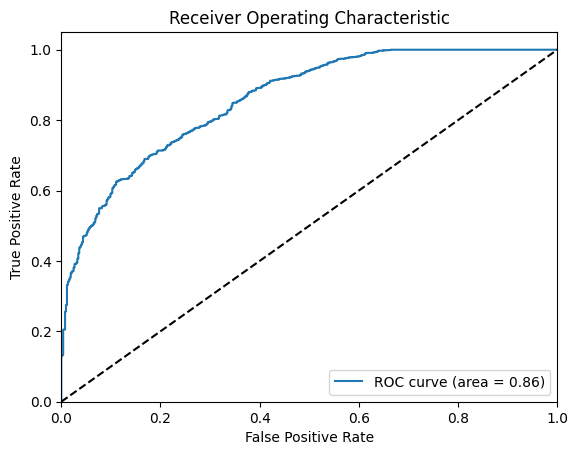

Evaluation Metrics:
Accuracy: 0.8154057771664374
Precision: 0.935380221349518
Recall: 0.842443729903537
F1 Score: 0.8864828286245982
Confusion Matrix:
[[ 344  181]
 [ 490 2620]]

{'Accuracy': 0.8154057771664374, 'Precision': 0.935380221349518, 'Recall': 0.842443729903537, 'F1 Score': 0.8864828286245982, 'Confusion Matrix': array([[ 344,  181],
       [ 490, 2620]], dtype=int64)}
Evaluating Decision Tree...


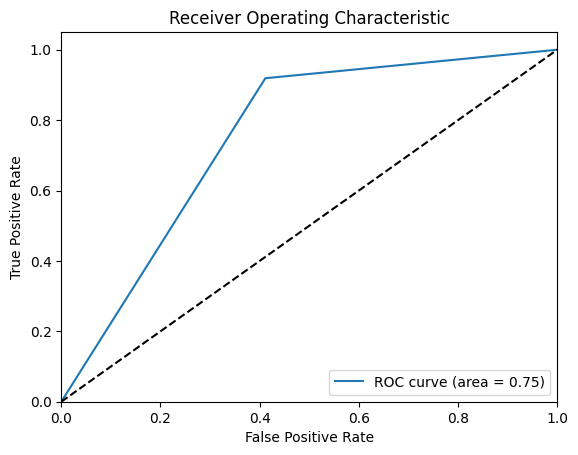

Evaluation Metrics:
Accuracy: 0.8712517193947731
Precision: 0.929733246584255
Recall: 0.9189710610932476
F1 Score: 0.9243208279430788
Confusion Matrix:
[[ 309  216]
 [ 252 2858]]

{'Accuracy': 0.8712517193947731, 'Precision': 0.929733246584255, 'Recall': 0.9189710610932476, 'F1 Score': 0.9243208279430788, 'Confusion Matrix': array([[ 309,  216],
       [ 252, 2858]], dtype=int64)}
Evaluating SVM...
Evaluation Metrics:
Accuracy: 0.7966987620357634
Precision: 0.9376153562200074
Recall: 0.8167202572347267
F1 Score: 0.8730022340608352
Confusion Matrix:
[[ 356  169]
 [ 570 2540]]

{'Accuracy': 0.7966987620357634, 'Precision': 0.9376153562200074, 'Recall': 0.8167202572347267, 'F1 Score': 0.8730022340608352, 'Confusion Matrix': array([[ 356,  169],
       [ 570, 2540]], dtype=int64)}
Evaluating Random Forest...


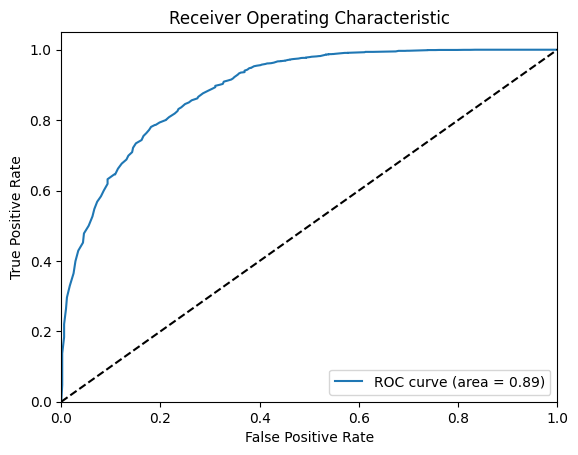

Evaluation Metrics:
Accuracy: 0.9092159559834938
Precision: 0.9176682692307693
Recall: 0.9819935691318328
F1 Score: 0.9487418452935695
Confusion Matrix:
[[ 251  274]
 [  56 3054]]

{'Accuracy': 0.9092159559834938, 'Precision': 0.9176682692307693, 'Recall': 0.9819935691318328, 'F1 Score': 0.9487418452935695, 'Confusion Matrix': array([[ 251,  274],
       [  56, 3054]], dtype=int64)}
Evaluating Neural Network...


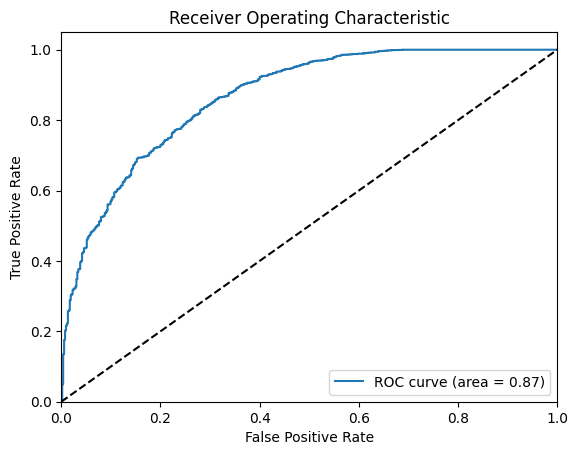

Evaluation Metrics:
Accuracy: 0.88060522696011
Precision: 0.9282970550576184
Recall: 0.932475884244373
F1 Score: 0.9303817773500159
Confusion Matrix:
[[ 301  224]
 [ 210 2900]]

{'Accuracy': 0.88060522696011, 'Precision': 0.9282970550576184, 'Recall': 0.932475884244373, 'F1 Score': 0.9303817773500159, 'Confusion Matrix': array([[ 301,  224],
       [ 210, 2900]], dtype=int64)}


In [121]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import pickle


def evaluate_model(model, X_train, y_train, X_test, y_test, param_grid):
    if isinstance(model, SVC):  # Use RandomizedSearchCV for SVM
        search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')
    else:
        search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')
    search.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot ROC curve if applicable
   # Plot ROC curve if applicable
    clf = list(model.named_steps.keys())[-1]  # Get the last step of the pipeline, which should be the classifier
    if hasattr(model.named_steps[clf], 'predict_proba'):
        y_prob = search.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
             # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

    
    # Print evaluation metrics and confusion matrix
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{cm}\n")
    
    return search

def build_and_evaluate_models(X_train, y_train, X_test, y_test):

    pipeline_steps = [
        # Define or replace 'clmn_trfm1' and 'clmn_trfm2' with actual transformers
        ('preprocessing_1', clmn_trfm1),
        ('preprocessing_2', clmn_trfm2)
    ]
    pipeline = Pipeline(pipeline_steps)

    
    
    # Define model pipelines
    model_pipelines = {
        'Logistic Regression': make_pipeline(pipeline, LogisticRegression(solver='liblinear')),
        'Decision Tree': make_pipeline(pipeline, DecisionTreeClassifier()),
        'SVM': make_pipeline(pipeline, SVC()),
        'Random Forest': make_pipeline(pipeline, RandomForestClassifier()),
        'Neural Network': make_pipeline(pipeline, MLPClassifier())
    }

    # Define hyperparameter grids for GridSearchCV or RandomizedSearchCV
    param_grids = {
        'Logistic Regression': {
            'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'logisticregression__penalty': ['l1', 'l2']
        },
        'Decision Tree': {
            'decisiontreeclassifier__max_depth': [None, 5, 10, 15, 20],
            'decisiontreeclassifier__min_samples_split': [2, 5, 10],
            'decisiontreeclassifier__min_samples_leaf': [1, 2, 5]
        },
        'SVM': {
            'svc__C': [0.001, 0.01, 0.1],
            'svc__gamma': ['scale'],
            'svc__kernel': ['linear']
        },
        'Random Forest': {
            'randomforestclassifier__n_estimators': [10, 50, 100, 200],
            'randomforestclassifier__max_depth': [None, 5, 10, 15, 20],
            'randomforestclassifier__min_samples_split': [2, 5, 10],
            'randomforestclassifier__min_samples_leaf': [1, 2, 5]
        },  
        'Neural Network': {
            'mlpclassifier__hidden_layer_sizes': [(50,), (100,)],
            'mlpclassifier__activation': ['relu'], 
            'mlpclassifier__solver': ['adam'],
            'mlpclassifier__alpha': [0.0001],
            'mlpclassifier__learning_rate': ['constant'],
        }
    }
    
    # Evaluate models
    results = {}
    for name, pipeline in model_pipelines.items():
        print(f"Evaluating {name}...")
        search = evaluate_model(pipeline, X_train, y_train, X_test, y_test, param_grids[name])
        # Extract metrics directly after the GridSearchCV evaluation
        y_pred = search.predict(X_test)
        metrics = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred),
            'Confusion Matrix': confusion_matrix(y_test, y_pred)
        }
        results[name] = {'model': search, 'metrics': metrics}
        print(metrics)

    return results


# Example usage:
results = build_and_evaluate_models(X_train, y_train, X_test, y_test)


Saving the pickle Model

In [122]:
best_model_name = max(results, key=lambda x: results[x]['model'].best_score_)
best_model = results[best_model_name]['model'].best_estimator_

print(best_model)


with open('final_model_pipeline.pkl', 'wb') as file:
    pickle.dump(best_model, file)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('preprocessing_1',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('process_high_null_values',
                                                                   FunctionTransformer(func=<function preprocess_high_null_values at 0x000002363B2468E0>),
                                                                   ['MANOEUVER',
                                                                    'PEDTYPE',
                                                                    'CYCACT',
                                                                    'DRIVACT']),
                                                                  ('fill_mode',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['ROAD_CLASS',
  

Test Data for pickle file

In [123]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=32)

# Load the model
with open('final_model_pipeline.pkl', 'rb') as file:
    model = pickle.load(file)

# Predict using the loaded model
y_pred = model.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  
recall = recall_score(y_test, y_pred, average='binary')        
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 0.9053905390539054
Precision: 0.9099639855942377
Recall: 0.9856957087126138
Confusion Matrix:
 [[ 130  150]
 [  22 1516]]


In [136]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [139]:
# Find the indices of the first occurrences of each unique prediction
y_pred = pd.Series(y_pred)
unique_predictions = y_pred.unique()
indices = [y_pred[y_pred == pred].index[0] for pred in unique_predictions]

# Print a test data row for each unique prediction
for index in indices:
    print(f"Prediction: {y_pred[index]}")
    print(X_test.iloc[index])
    print("\n")

Prediction: 1
ROAD_CLASS                                              Major Arterial
DISTRICT                                                    North York
LOCCOORD                                                  Intersection
TRAFFCTL                                                     Stop Sign
VISIBILITY                                                        Rain
LIGHT                                                         Daylight
RDSFCOND                                                           Wet
IMPACTYPE                                        Pedestrian Collisions
INVTYPE                                                     Pedestrian
INVAGE                                                        75 to 79
INJURY                                                           Major
INITDIR                                                          South
MANOEUVER                                                          NaN
DRIVACT                                                        